<a href="https://colab.research.google.com/github/gpricechristie/hsstSQL/blob/main/postgreSQL_SimpleQueries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to database and develop simple queries
In this notebook, we use the psycopg2 library in Python to connect to an online postgreSQL database and conduct some simple queries of the data using postgres. The Postgres query language is a variant of the SQL standard. 
We will use the popular Pandas library to allow us ot display and interact with the data resulting form the queries.

##Connect to database
First import the library used to connect to the database - we use the psycopg2 and SQLAlchemy libraries.


In [19]:
import psycopg2
from sqlalchemy import create_engine, text
from sqlalchemy.engine.url import URL
import pandas as pd
import pandas.io.sql as sqlio

The URL.create() method of the SQLAlchemy library generates the connection string we pass to the connection engine
<li> The host is the address of the server - in this case an instance of the Render hosting service
<li> The database name on the host (TCP/IP)
<li> The TCP/IP port - the standard for postgreSQL is 5432
<li> The database user name and password 

In [17]:
connectionURL = URL.create("postgresql+psycopg2",
                           username="hsst_b2_user",
                           password="vXo6LXzqMx6t8KwvsIdasO4iVLCoxQ7o",
                           host="dpg-chagapak728r884bicp0-a.frankfurt-postgres.render.com",
                           database="hsst_b2_clinical_computing")
connection_engine = create_engine(connectionURL)

The actual SQL query itself is assigned to a variable.
This query selects everything from the "SIM_AV_PATIENT" table of the Cancer Services and Outcomes dataset. Using the LIMIT command means we only select the first 100 rows of data from the table.

In [15]:
sql= "SELECT * FROM \"SIM_AV_PATIENT\" LIMIT 100"


Run the query against the database connection and write the output to a Pandas dataframe.

In [20]:
with connection_engine.connect() as connection:
  data = pd.DataFrame(connection.execute(text(sql)))
  connection.close()

Use the display command to examine the resulting data. Clicking the 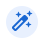 magic table icon will allow you to explore the table in an interactive way.

In [21]:
display(data)

,PATIENTID,SEX,NHSNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE
0,220001002,1,1020001002,A,C800,,,,C169,1,D,2015-06-29
1,220000383,2,1020000383,A,"C798,C800","C798,C800",,G309,C809,1,D,2015-04-30
2,220000384,2,1020000384,A,A419,,,,C800,1,D,2015-04-30
3,220000385,2,1020000385,A,"C787,C780",,,,C439,6,D,2017-10-12
4,220000386,2,1020000386,A,I679,,,,C800,5,D,2015-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...
95,220000504,1,1020000504,A,N390,,,C931,C809,6,D,2017-12-09
96,220000505,2,1020000505,A,J180,,,,C80,1,D,2014-10-24
97,220000507,2,1020000507,A,C80,,,,C80,1,D,2014-10-07
98,220000509,1,1020000509,H,"C809,C800","C809,C800",,F03,J449,4,D,2014-03-01
